In [24]:

!git clone https://github.com/bia38/Sloth-Analysis.git

Cloning into 'Sloth-Analysis'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), done.
Resolving deltas: 100% (1/1), done.


**Let's import the needed modules and dataset**

Sloths!
Sloths are a group of arboreal Neotropical xenarthran mammals, constituting the suborder Folivora. Noted for their slowness of movement, they spend most of their lives hanging upside down in the trees of the tropical rainforests of South America and Central America.

There are six extant sloth species in two genera – Bradypus (three–toed sloths) and Choloepus (two–toed sloths). Despite this traditional naming, all sloths actually have three toes on each rear limb, although two-toed sloths have only two digits on each forelimb.

Sloths are so named because of their very low metabolism and deliberate movements. Sloth, related to slow, literally means "laziness," and their common names in several other languages (e.g. French paresseux) also mean "lazy" or similar. Their slowness permits their low-energy diet of leaves and avoids detection by predatory hawks and cats that hunt by sight.

https://en.wikipedia.org/wiki/Sloth

In [25]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore', FutureWarning)

sloth = Table.read_table('https://raw.githubusercontent.com/JA-McLean/STOR120/master/data/sloth120.csv')
sloth.show(5)

Claw_Length_cm,Endangered,Size_cm,Species,Sub_Species,Tail_Length_cm,Weight_kg
7.195,least_concern,49.905,three_toed,Pale-throated sloth,4.855,5.737
5.987,least_concern,63.257,two_toed,Hoffmans two-toed sloth,2.147,6.017
5.89,least_concern,61.366,two_toed,Hoffmans two-toed sloth,3.208,5.355
8.244,least_concern,65.266,two_toed,Linnaeus two-toed sloth,2.075,5.452
5.731,least_concern,62.434,two_toed,Hoffmans two-toed sloth,3.526,5.373


**1 EXPLORATORY DATA ANALYSIS**

1.1 Let's construct a table sloth_means with six rows and five columns. 
There should be one row for each sub species of sloth. The columns should be the name of the sub species, mean claw lengths, mean tail lengths, mean sizes, and mean weights.

In [26]:
sloth_means=sloth.group('Sub_Species',np.mean).drop('Endangered mean').drop('Species mean')
sloth_means 

Sub_Species,Claw_Length_cm mean,Size_cm mean,Tail_Length_cm mean,Weight_kg mean
Brown-throated sloth,7.44171,61.0119,5.72225,4.23063
Hoffmans two-toed sloth,5.7556,63.0179,2.66505,5.57179
Linnaeus two-toed sloth,8.86383,65.8075,1.8031,6.47693
Maned three-toed sloth,7.54775,63.5116,4.90664,5.77009
Pale-throated sloth,7.54132,50.0121,4.91324,4.58988
Pygmy three-toed sloth,7.73862,50.5351,5.384,2.64487


1.2-Let's construct a table sloth_SU. 
This table should contain the columns Endangered, Species, and Sub_species from the sloth table, as well as columns of the remaining quantitaive variables (Claw_Length_cm, Size_cm, Tail_Length_cm, and Weight_kg) in standard units.

In [27]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

sloth_SU =Table().with_columns('Endangered',sloth.column('Endangered'),
                               'Species',sloth.column('Species'),
                               'Sub_Species',sloth.column('Sub_Species'),
                               'Claw_Length_cm_SU',standard_units(sloth.column('Claw_Length_cm')),
                             'Size_cm_SU',standard_units(sloth.column('Size_cm')),
                             'Tail_Length_cm_SU',standard_units(sloth.column('Tail_Length_cm')),
                             'Weight_kg_SU',standard_units(sloth.column('Weight_kg'))
                              )
                                                                
sloth_SU

Endangered,Species,Sub_Species,Claw_Length_cm_SU,Size_cm_SU,Tail_Length_cm_SU,Weight_kg_SU
least_concern,three_toed,Pale-throated sloth,0.0604091,-1.50311,0.270426,0.649652
least_concern,two_toed,Hoffmans two-toed sloth,-0.858384,0.75551,-1.43598,0.882817
least_concern,two_toed,Hoffmans two-toed sloth,-0.932161,0.435629,-0.767408,0.33155
least_concern,two_toed,Linnaeus two-toed sloth,0.858269,1.09535,-1.48135,0.412324
least_concern,two_toed,Hoffmans two-toed sloth,-1.0531,0.616291,-0.567025,0.346539
least_concern,three_toed,Brown-throated sloth,1.01723,0.367289,1.46453,0.397335
vulnerable,three_toed,Maned three-toed sloth,0.809591,1.02836,1.02659,0.22496
least_concern,three_toed,Pale-throated sloth,-0.0301011,-1.60951,0.747439,1.16012
least_concern,two_toed,Hoffmans two-toed sloth,-1.81064,0.494158,-1.44165,0.983577
least_concern,three_toed,Brown-throated sloth,0.762434,0.498218,0.776425,0.411492


1.3-What proportion of the sloths in the dataset are more than one standard deviation below the mean values for Claw_Length_cm and Tail_Length_cm? Let's assign this float value to small_sloth_prop

In [28]:
small_sloth_prop = sloth_SU.where('Claw_Length_cm_SU',
                                  are.below(-1)).where('Tail_Length_cm_SU',
                                                       are.below(-1)).num_rows/sloth_SU.num_rows
small_sloth_prop

0.081

1.4-what sub species of sloth do the majority of these sloths belong to? Let assign this string to small_sloth_majority_sub_species

In [29]:
small_sloth_majority_sub_species = sloth_SU.where('Claw_Length_cm_SU',
                                  are.below(-1)).where('Tail_Length_cm_SU',
                                                       are.below(-1)).group('Sub_Species').sort('count',
                                                                                                descending=True).column(0).item(0)
small_sloth_majority_sub_species

'Hoffmans two-toed sloth'

1.5-Let's construct a scatter plot with the sloths' tail length on the horizontal axis and weight on the vertical axis (using the original sloth table). Include the best fit line in this plot

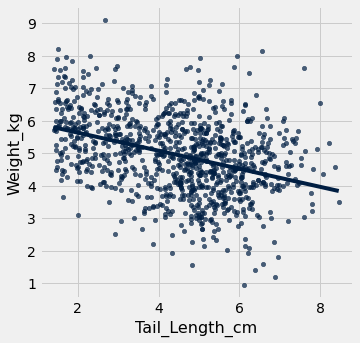

In [30]:
sloth.scatter('Tail_Length_cm','Weight_kg',fit_line=True)

1.6-Let's calculate the correlation coefficient for the relationship between the sloths' tail length and weight and assign this value to corr

In [31]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))


corr =correlation(sloth,'Tail_Length_cm','Weight_kg')
corr

-0.3681662674527372

**2 TESTING AND PREDICTIONS**

The mean attributes for some sloth sub species are quite different, while some are similar. The mean claw lengths for instance for the Brown-throated sloth and the Pale-throated sloth are roughly a millimeter different on average. Given the large sample size, does this small difference provide evidence that Brown-throated sloth and Pale-throated sloth have different mean claw lengths?

2.1.1 Let's construct a new table throated_sloth that contains only sloths of the sub species Brown-throated sloth and Pale-throated sloth (using the original sloth table)

In [32]:
throated_sloth=sloth.where('Sub_Species',are.not_equal_to('Hoffmans two-toed sloth')).where('Sub_Species',are.not_equal_to('Linnaeus two-toed sloth')).where('Sub_Species',
are.not_equal_to('Maned three-toed sloth')).where('Sub_Species',are.not_equal_to('Pygmy three-toed sloth'))
throated_sloth

Claw_Length_cm,Endangered,Size_cm,Species,Sub_Species,Tail_Length_cm,Weight_kg
7.195,least_concern,49.905,three_toed,Pale-throated sloth,4.855,5.737
8.453,least_concern,60.962,three_toed,Brown-throated sloth,6.75,5.434
7.076,least_concern,49.276,three_toed,Pale-throated sloth,5.612,6.35
8.118,least_concern,61.736,three_toed,Brown-throated sloth,5.658,5.451
7.068,least_concern,51.746,three_toed,Pale-throated sloth,5.049,5.014
7.753,least_concern,61.944,three_toed,Brown-throated sloth,5.303,2.972
8.151,least_concern,59.909,three_toed,Brown-throated sloth,6.181,4.505
8.564,least_concern,60.617,three_toed,Brown-throated sloth,3.816,4.08
9.073,least_concern,59.734,three_toed,Brown-throated sloth,6.803,4.961
6.246,least_concern,52.758,three_toed,Pale-throated sloth,5.199,4.768


2.1.2 Let's find the absolute difference in mean claw length between Brown-throated sloth and Pale-throated sloth from either the throated_sloth 

In [33]:
def difference_of_props(table, group_label, outcome):
    """Takes: name of table, column label of binary categorical variable,
    column label of group-label variable
    Returns: Difference of proportions of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(outcome, group_label)  
    
    # table containing counts for each group
    summary_table = reduced.group(group_label, np.mean)
    
    return summary_table.column(1).item(0) - summary_table.column(1).item(1)

mean_claw_diff = abs(difference_of_props(throated_sloth,'Sub_Species','Claw_Length_cm'))
mean_claw_diff

0.09961589439295881

2.1.3 Let's perform a hypothesis test (using A/B testing methods) to draw a conclusion about the null and alternative hypotheses below at a 5% significance level. Let perform your simulation only 500 times! Let assign the p-value of your hypothesis test to sloth_p_value

Null Hypothesis: There is no difference in the mean claw lengths of Brown-throated sloths and Pale-throated sloths.

Alternative Hypothesis: There is a difference in the mean claw lengths of Brown-throated sloths and Pale-throated sloths.

Observed Difference: 0.09961589439295881


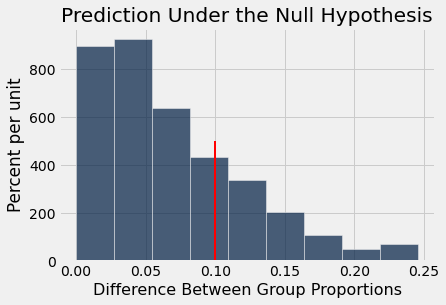

In [34]:
# Perform your hypothesis test here
def one_simulated_difference(table, group_label, outcome):
    """Takes: name of table, column label of binary cateogorcial variable,
    column label of group-label variable
    
    Returns: Difference of proportions of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of outcome variable and shuffled labels
    shuffled_table = table.select(outcome).with_column(
        'Shuffled Label', shuffled_labels)
    
    return abs(difference_of_props(shuffled_table, 'Shuffled Label', outcome))

differences = make_array()

for i in np.arange(500):
    new_difference = one_simulated_difference(throated_sloth, 'Sub_Species', 'Claw_Length_cm')
    differences = np.append(differences, new_difference)

Table().with_column('Difference Between Group Proportions', differences).hist(bins=9)
print('Observed Difference:', mean_claw_diff)
plots.title('Prediction Under the Null Hypothesis');
plots.plot([mean_claw_diff, mean_claw_diff], [0, 5], color='red', lw=2);


In [11]:
sloth_p_value =p_value = sum(differences>=mean_claw_diff)/500
p_value
sloth_p_value

0.248


With a p_value of 0.246 which is greater than 0.05, the test is not significant at 5% and thus we fail to reject the null that says that there is no difference in the mean claw lengths of Brown-throated sloths and Pale-throated sloths.

2.2 **Weight vs. Tail Length** 

2.2.1 We analyzed the relationship between sloths' tail length and weight. Now we will determine the slope and the intercept for the linear regression model using tail length as the predictor and weight as the response (again using the sloth table containing all six sub species of sloths). Let's assign the value of the slope of this model to sloth_slope and the intercept of this model to sloth_intercept

In [35]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)


def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')
    

def fitted_value(table, x, y, given_x):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * given_x  + b


sloth_slope = slope(sloth,'Tail_Length_cm','Weight_kg')
sloth_intercept =intercept(sloth,'Tail_Length_cm','Weight_kg')

# Do not change the below code
5 * sloth_slope + sloth_intercept

4.796894975590892

2.2.2 Let's use the linear regression model to construct a 99% confidence interval for the mean weight of sloths with a tail length of 5cm. Perform your simulation only 500 times! Let assign the upper and lower bounds of your confidence interval to lower_bound_weight and upper_bound_weight

In [36]:
# Perform your simulation here
def bootstrap_prediction(table, x, y, new_x, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter; 
    # get the regression prediction at new_x; 
    # augment the predictions list
    predictions = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample()
        bootstrap_prediction = fitted_value(bootstrap_sample, x, y, new_x)
        predictions = np.append(predictions, bootstrap_prediction)
    return predictions
    # Find the ends of the approximate 95% prediction interval

In [37]:
lower_bound_weight =percentile(0.5, bootstrap_prediction(sloth,'Tail_Length_cm','Weight_kg', 5, 500))
upper_bound_weight = percentile(99.5, bootstrap_prediction(sloth,'Tail_Length_cm','Weight_kg', 5, 500))

# do not change the below code
lower_bound_weight, upper_bound_weight

(4.692155405844693, 4.917231641917594)

2.2.3 Let's construct new table sloth_with_residuals. This table should include all of the rows and columns of the sloth table, as well as two new columns. 
- Prediction for Weight - the values of the weight for each sloth predicted by the linear regression model.
- Residual for Weight - the differences between the sloths' actual weight and the weights predicted by the linear regression model.

In [38]:
sloth_with_residuals = sloth.with_columns('Prediction for Weight',fit(sloth,'Tail_Length_cm','Weight_kg'),
                                          'Residual for Weight',residual(sloth,'Tail_Length_cm','Weight_kg'))
sloth_with_residuals

Claw_Length_cm,Endangered,Size_cm,Species,Sub_Species,Tail_Length_cm,Weight_kg,Prediction for Weight,Residual for Weight
7.195,least_concern,49.905,three_toed,Pale-throated sloth,4.855,5.737,4.83729,0.899709
5.987,least_concern,63.257,two_toed,Hoffmans two-toed sloth,2.147,6.017,5.59173,0.425272
5.89,least_concern,61.366,two_toed,Hoffmans two-toed sloth,3.208,5.355,5.29614,0.0588618
8.244,least_concern,65.266,two_toed,Linnaeus two-toed sloth,2.075,5.452,5.61179,-0.159787
5.731,least_concern,62.434,two_toed,Hoffmans two-toed sloth,3.526,5.373,5.20754,0.165455
8.453,least_concern,60.962,three_toed,Brown-throated sloth,6.75,5.434,4.30935,1.12465
8.18,vulnerable,64.87,three_toed,Maned three-toed sloth,6.055,5.227,4.50298,0.724023
7.076,least_concern,49.276,three_toed,Pale-throated sloth,5.612,6.35,4.62639,1.72361
4.735,least_concern,61.712,two_toed,Hoffmans two-toed sloth,2.138,6.138,5.59424,0.543765
8.118,least_concern,61.736,three_toed,Brown-throated sloth,5.658,5.451,4.61358,0.837421


2.2.4 Is there a pattern in the residuals based on species? To answer this, let make two plots, each with Residual for Weight on the vertical axis and Prediction for Weight on the horizontal axis. For the first plot we only use the rows in the sloth_with_residuals table corresponding to two toed sloths. For the second plotwe  only include three toed sloths. Do the two plots show similar or different patterns in variability? 

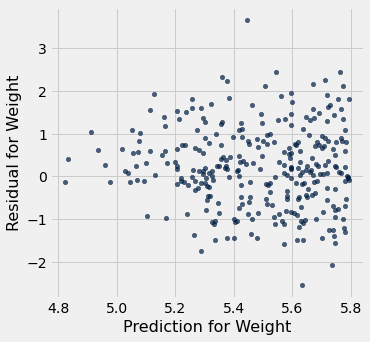

In [39]:
# Plot for two toed sloths
sloth_with_residuals.where('Species','two_toed').scatter('Prediction for Weight','Residual for Weight')

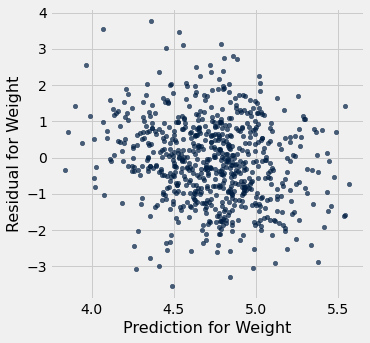

In [40]:
# Plot for three toed sloths
sloth_with_residuals.where('Species','three_toed').scatter('Prediction for Weight','Residual for Weight')

Conlcusion:

The two plots do not show similar patterns in variability. The residual plot with the two-toed sloths shows a fan pattern which means the variance of the residuals is not constant. The residual plot with three-toed sloths does not display any identified pattern, so the variance of the residuals seems much constant.In short, the two plots have different variability.

**3 CLASSIIFICATION**

3.1 let's construct a new table sloth_classify with three columns. The first two columns should be sloths' claw length and tail length in standard units. The third column should be named Class and equal to the integer 1 for sloths of the sub species Hoffman’s two-toed sloth and the integer 0 for all other sub species of sloth.

In [41]:
Class=make_array()
for i in np.arange(sloth.num_rows):
    if sloth.column('Sub_Species').item(i)=='Hoffmans two-toed sloth':
        Class=np.append(Class,1)
    else:
        Class=np.append(Class,0)
sloth_classify = Table().with_columns('Claw_Length_cm',sloth.column('Claw_Length_cm'),
                                      'Tail_Length_cm',sloth.column('Tail_Length_cm'),
                                     'Class',Class)
sloth_classify

Claw_Length_cm,Tail_Length_cm,Class
7.195,4.855,0
5.987,2.147,1
5.89,3.208,1
8.244,2.075,0
5.731,3.526,1
8.453,6.75,0
8.18,6.055,0
7.076,5.612,0
4.735,2.138,1
8.118,5.658,0


In [42]:
sloth_classify.group('Class')

Class,count
0,743
1,257


3.2 Let's construct two new tables (sloth_train and sloth_test). We randomly assign 80% of the data in sloth_classify to the training set and the remaining 20% of the data to the testing set.

In [43]:
sloth.num_rows*0.8
shuffled_sloth=sloth_classify.sample(with_replacement=False)

sloth_train =shuffled_sloth.take(np.arange(800))
sloth_test = shuffled_sloth.take(np.arange(800,1000))

In [21]:
sloth_train

Claw_Length_cm,Tail_Length_cm,Class
7.249,2.677,0
7.582,7.606,0
6.351,3.348,1
7.238,1.899,1
5.165,3.134,1
7.943,4.635,0
7.977,5.354,0
8.707,4.842,0
6.251,3.077,1
8.18,6.055,0


In [44]:
sloth_test

Claw_Length_cm,Tail_Length_cm,Class
7.114,4.15,0
8.129,4.641,0
5.726,3.442,1
7.79,6.861,0
6.985,6.661,0
4.602,3.233,1
9.073,6.803,0
8.802,1.61,0
6.982,4.297,0
8.5,5.003,0


3.3 Let's use the training data set to classify the sloths in your testing data set as either Hoffman’s two-toed sloth or not Hoffman’s two-toed sloth. To answer this question, we implement a k-Nearest Neighbors algorithm (with k=5). Then we evaluate the accuracy of this classification model and assign sloth_accuracy to the proportion of the testing data that is correctly classified

In [45]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)


def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, new_point):
    """Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(np.array(list(new_point)), np.array(list(row)))
    return attributes.apply(distance_from_point)

def table_with_distances(training, new_point):
    """Augments the training table 
    with a column of distances from new_point"""
    return training.with_column('Distance', all_distances(training, new_point))

def closest(training, new_point, k):
    """Returns a table of the k rows of the augmented table
    corresponding to the k smallest distances"""
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

def majority(topkclasses):
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

def evaluate_accuracy(training, test, k):
    """Return the proportion of correctly classified examples 
    in the test set"""
    test_attributes = test.drop('Class')
    num_correct = 0
    for i in np.arange(test.num_rows):
        c = classify(training, test_attributes.row(i), k)
        num_correct = num_correct + (c == test.column('Class').item(i))
    return num_correct / test.num_rows


sloth_accuracy = evaluate_accuracy(sloth_train,sloth_test, 5)
sloth_accuracy

0.93

The accuracy of the model is 0.93 which shows that the model is good.